In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [3]:
warnings.filterwarnings("ignore")


In [10]:
import os
print(os.listdir("C:\\Users\\user\\Desktop\\birth date prediction"))





['birthdate.ipynb', 'US_births_2000-2014_SSA.csv']


In [21]:
file_2000_2014 = pd.read_csv('C:\\Users\\user\\Desktop\\birth date prediction\\US_births_2000-2014_SSA.csv')
file = file_2000_2014.copy()
file = file[file["year"] >= 2000]
file = pd.concat([file], axis=0)
file.head(9)



,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558
5,2000,1,6,4,12466
6,2000,1,7,5,12516
7,2000,1,8,6,8934
8,2000,1,9,7,7949


In [22]:
file['date'] = file["year"].map(str)+ "-" + file["month"].map(str)+ "-" + file["date_of_month"].map(str)
file.head()

,year,month,date_of_month,day_of_week,births,date
0,2000,1,1,6,9083,2000-1-1
1,2000,1,2,7,8006,2000-1-2
2,2000,1,3,1,11363,2000-1-3
3,2000,1,4,2,13032,2000-1-4
4,2000,1,5,3,12558,2000-1-5


In [25]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Baca dataset dari file CSV
train = pd.read_csv('C:\\Users\\user\\Desktop\\birth date prediction\\US_births_2000-2014_SSA.csv')

# Inisialisasi MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))

# Normalisasi data
train_scaled = sc.fit_transform(train)


In [26]:
X_train = []
y_train = []
for i in range(60, 200):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

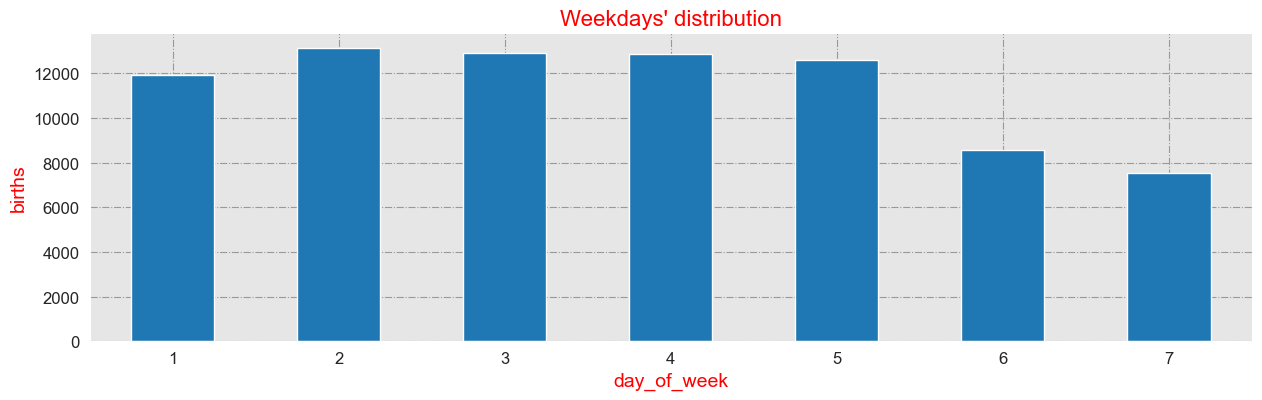

In [3]:
import pandas as pd

# Gantilah 'path/to/your/dataset.csv' dengan lokasi file CSV Anda
file = pd.read_csv('C:\\Users\\user\\Desktop\\birth date prediction\\US_births_2000-2014_SSA.csv')

# Sekarang, lanjutkan dengan kode visualisasi Anda
plt.figure(figsize=(15,4))
sns.set_style("darkgrid", {"axes.facecolor": "0.9", 'grid.color': '.6', 'grid.linestyle': '-.'})
dist1 = file.groupby("day_of_week")["births"].mean()

dist1.plot(kind='bar', rot=0)
plt.xlabel("day_of_week", fontsize=14, color="r")
plt.ylabel("births", fontsize=14, color="r")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Weekdays' distribution", fontsize=16, color="r")
plt.show()


In [4]:
file.describe()


,year,month,date_of_month,day_of_week,births
count,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000
mean,2006.999270,6.522723,15.730243,3.999817,11350.068261
std,4.321085,3.449075,8.801151,2.000502,2325.821049
min,2000.000000,1.000000,1.000000,1.000000,5728.000000
25%,2003.000000,4.000000,8.000000,2.000000,8740.000000
50%,2007.000000,7.000000,16.000000,4.000000,12343.000000
75%,2011.000000,10.000000,23.000000,6.000000,13082.000000
max,2014.000000,12.000000,31.000000,7.000000,16081.000000


In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           5479 non-null   int64
 1   month          5479 non-null   int64
 2   date_of_month  5479 non-null   int64
 3   day_of_week    5479 non-null   int64
 4   births         5479 non-null   int64
dtypes: int64(5)
memory usage: 214.2 KB


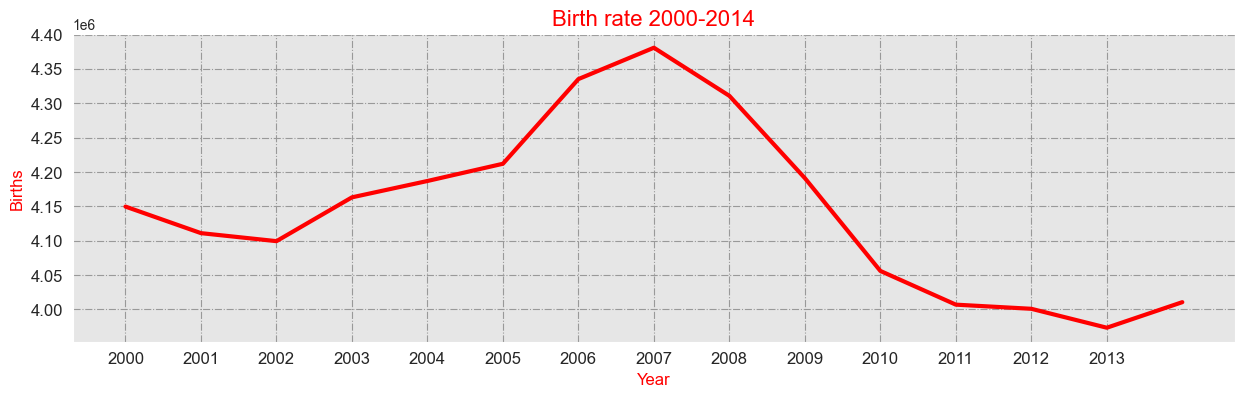

In [7]:
plt.figure(figsize=(15,4))
year_sum=file.groupby("year")[['births']].sum()
plt.plot(year_sum, linewidth=3, color="r")
plt.xlabel("Year", fontsize=12, color="r")
plt.ylabel("Births", fontsize=12, color="r")
plt.xticks(range(2000,2014,1), fontsize=12); plt.yticks(fontsize=12)
plt.title("Birth rate 2000-2014", fontsize=16, color="r")
plt.show()

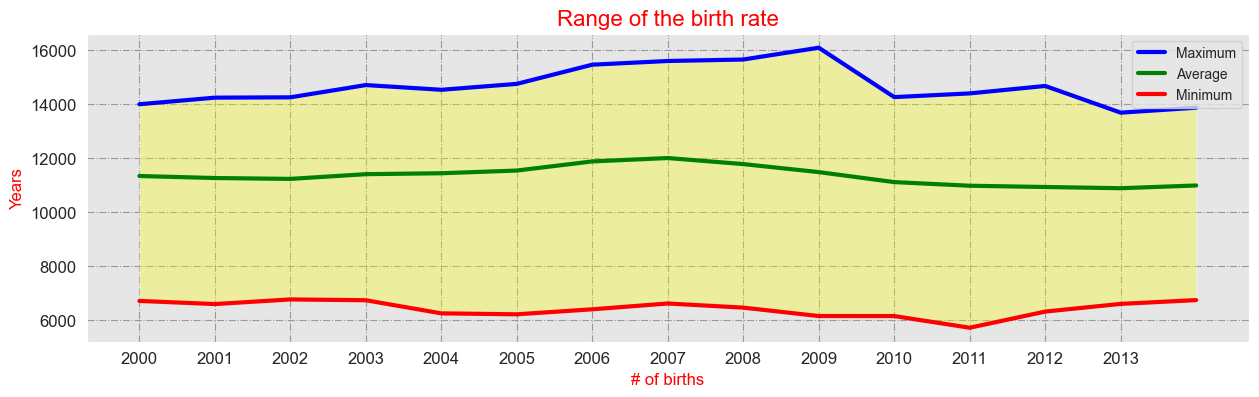

In [9]:
plt.figure(figsize=(15,4))
year_min=file.groupby("year")[['births']].min(); year_max=file.groupby("year")[['births']].max(); year_mean=file.groupby("year")[['births']].mean()
x=year_mean.index
plt.plot(year_max, linewidth=3, label="Maximum", color="b")
plt.plot(year_mean, linewidth=3, label="Average", color="g")
plt.plot(year_min, linewidth=3, label="Minimum", color="r")
plt.fill_between(x,year_min["births"], year_max["births"], alpha=0.3, facecolor='yellow')
plt.xticks(range(2000,2014,1), fontsize=12); plt.yticks(fontsize=12)
plt.xlabel("# of births", fontsize=12, color="r"); plt.ylabel("Years", fontsize=12, color="r")
plt.title("Range of the birth rate", fontsize=16, color="r")
plt.legend(loc='best')
plt.draw()

In [10]:
file['date'] = file["year"].map(str)+ "-" + file["month"].map(str)+ "-" + file["date_of_month"].map(str)
file.head()


,year,month,date_of_month,day_of_week,births,date
0,2000,1,1,6,9083,2000-1-1
1,2000,1,2,7,8006,2000-1-2
2,2000,1,3,1,11363,2000-1-3
3,2000,1,4,2,13032,2000-1-4
4,2000,1,5,3,12558,2000-1-5


In [11]:
ts=file.copy()
ts=pd.DataFrame(ts, columns=['date', 'births'])
ts.tail()

,date,births
5474,2014-12-27,8656
5475,2014-12-28,7724
5476,2014-12-29,12811
5477,2014-12-30,13634
5478,2014-12-31,11990


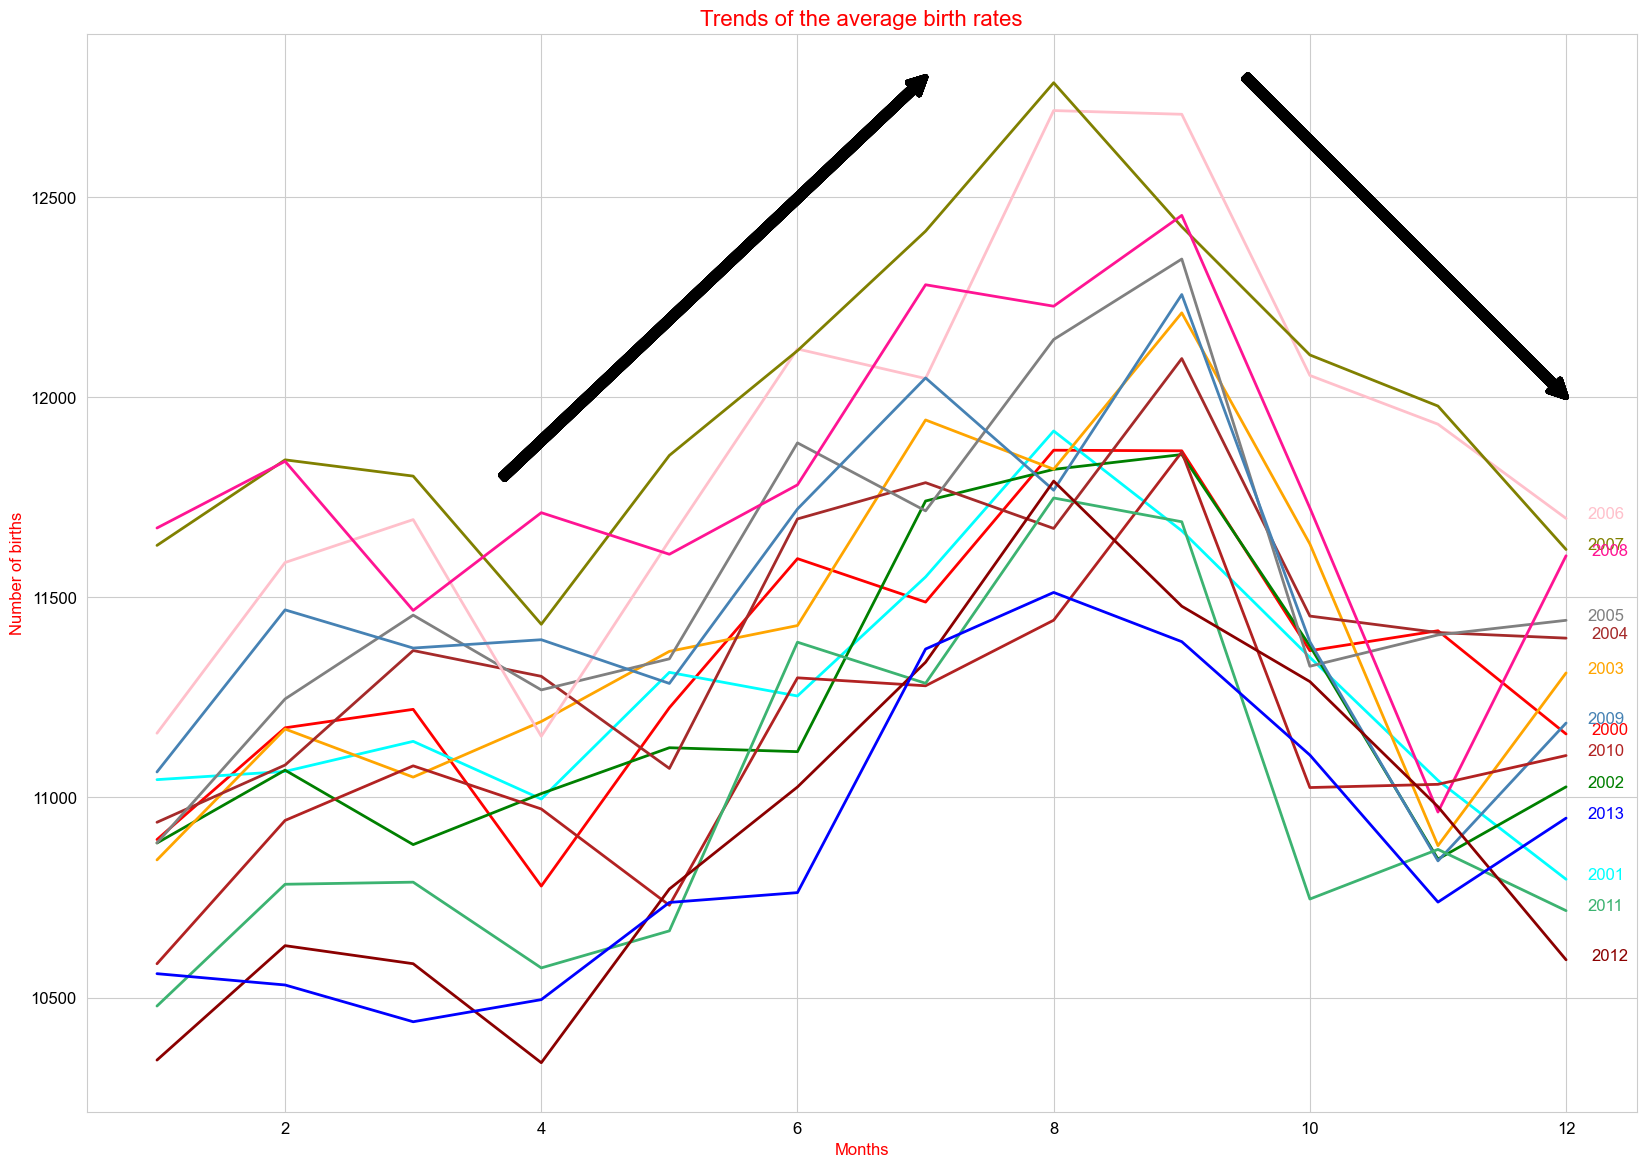

In [12]:
sns.set_style("whitegrid")
mycolors = ['red', 'cyan', 'green', 'orange', 'brown', \
            'grey', 'pink', 'olive', 'deeppink', 'steelblue', \
            'firebrick', 'mediumseagreen', 'darkred', 'blue', 'MediumVioletRed',\
            'darkorange', 'brown', 'purple', 'gold', 'yellow', 'maroon']
plt.figure(figsize=(20,14))
for i, c in enumerate(range(2000,2014)):
    file_c=file[file["year"]==c]
    file_c_grouped=file_c.groupby("month")[['births']].mean()
    x=file_c_grouped.index.tolist()
    y=file_cy=file_c_grouped['births']
    plt.plot(x,y, linewidth=2, label=c, color=mycolors[i])
    plt.text(file.loc[file.year==c, :].shape[0]/30, file_c_grouped[file_c_grouped.index==12]['births'].mean(), c, fontsize=12, color=mycolors[i])
    plt.yticks(fontsize=14, color="k")
    plt.xticks(fontsize=14, color="k")
    plt.xlabel("Months",fontsize=12, color="r")
    plt.ylabel("Number of births", fontsize=12, color="r")
    plt.annotate("", xy=(7, 12800), xytext=(3.7,11800), arrowprops=dict(ec="k", fc="k", lw=4))
    plt.annotate("", xy=(12,12000), xytext=(9.5, 12800), arrowprops=dict(ec="k", fc="k",  lw=4))
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Trends of the average birth rates", fontsize=16, color="r")
plt.draw()
